In [1]:
%pylab inline
from HOD_models_fix import decorated_hod_model
import sys
sys.stdout.flush()
from halotools.sim_manager import CachedHaloCatalog

Populating the interactive namespace from numpy and matplotlib


In [2]:
from halotools.mock_observables import return_xyz_formatted_array

from calc_jk_real import calc_jk_real

In [3]:
halocat = CachedHaloCatalog(simname='bolplanck', version_name='halotools_v0p4', redshift=0, halo_finder='rockstar')

In [4]:
model = decorated_hod_model()

In [5]:
param_names = ('alpha','logM1','sigma_logM','logM0','logMmin','mean_occupation_centrals_assembias_param1','mean_occupation_satellites_assembias_param1')

In [6]:
p19p0 = np.array((1.04029, 12.80315, 0.51193, 10.25010, 11.64354, 0., 0.))
p19p5 = np.array((1.11553, 13.06008, 0.44578, 11.29134, 11.75068, 0., 0.))
p20p0 = np.array((1.14385, 13.28584, 0.34846, 11.30750, 11.97186, 0., 0.))
p20p5 = np.array((1.19652, 13.59169, 0.18536, 11.20134, 12.25470, 0., 0.))
p21p0 = np.array((1.33738, 13.98811, 0.55950, 11.95797, 12.82356, 0., 0.))

In [7]:
proj_search_radius1 = 2.0         ##a cylinder of radius 2 Mpc/h
proj_search_radius2 = 5.0         ##a cylinder of radius 5 Mpc/h
cylinder_half_length = 10.0      ##half-length 10 Mpc/h

In [8]:
from halotools.mock_observables import counts_in_cylinders

In [9]:
model.param_dict.update(dict(zip(param_names, p19p0)))
try:
    model.mock.populate()
except:    
    model.populate_mock(halocat)

pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
            velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=250)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)

cic2_19p0 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius1,cylinder_half_length,period=250)
cic5_19p0 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius2,cylinder_half_length,period=250)

model.param_dict.update(dict(zip(param_names, p19p5)))
try:
    model.mock.populate()
except:    
    model.populate_mock(halocat)

pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
            velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=250)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)

cic2_19p5 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius1,cylinder_half_length,period=250)
cic5_19p5 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius2,cylinder_half_length,period=250)

model.param_dict.update(dict(zip(param_names, p20p0)))
try:
    model.mock.populate()
except:    
    model.populate_mock(halocat)

pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
            velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=250)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)

cic2_20p0 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius1,cylinder_half_length,period=250)
cic5_20p0 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius2,cylinder_half_length,period=250)

model.param_dict.update(dict(zip(param_names, p20p5)))
try:
    model.mock.populate()
except:    
    model.populate_mock(halocat)

pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
            velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=250)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)

cic2_20p5 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius1,cylinder_half_length,period=250)
cic5_20p5 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius2,cylinder_half_length,period=250)

model.param_dict.update(dict(zip(param_names, p21p0)))
try:
    model.mock.populate()
except:    
    model.populate_mock(halocat)

pos_gals_d = return_xyz_formatted_array(*(model.mock.galaxy_table[ax] for ax in 'xyz'), \
            velocity=model.mock.galaxy_table['vz'], velocity_distortion_dimension='z',\
                                          period=250)             ##redshift space distorted
pos_gals_d = np.array(pos_gals_d,dtype=float)

cic2_21p0 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius1,cylinder_half_length,period=250)
cic5_21p0 = counts_in_cylinders(pos_gals_d,pos_gals_d,proj_search_radius2,cylinder_half_length,period=250)

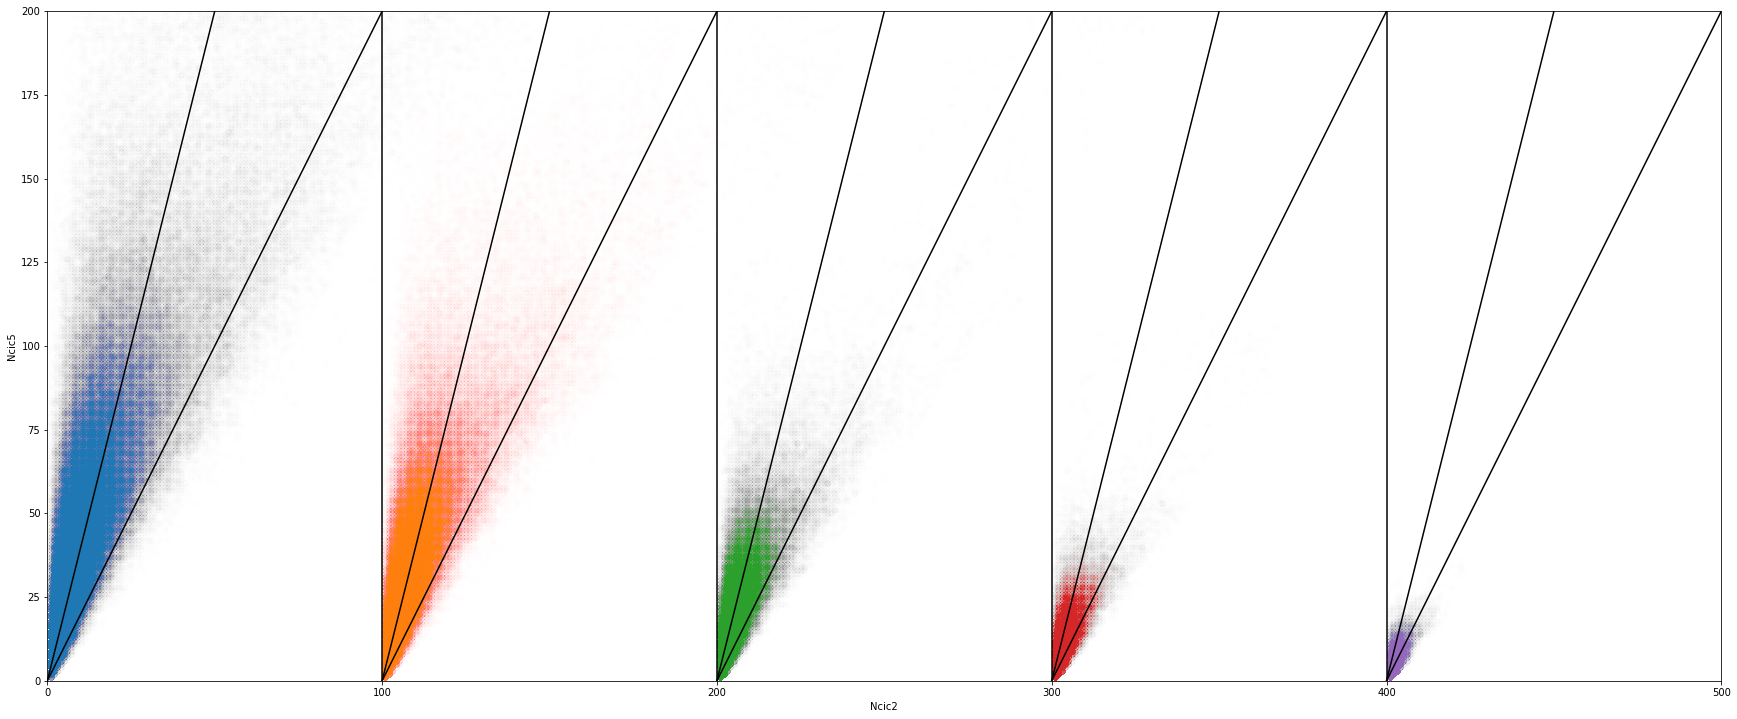

In [60]:
fig,ax = plt.subplots(figsize=[30,30])
ax.set_aspect('equal', 'box')
ax.set_xlim((0,500))
ax.set_ylim((0,200))
ax.scatter(cic2_19p0,cic5_19p0,alpha=0.005)
ax.scatter(cic2_19p5+100,cic5_19p5,alpha=0.005)
ax.scatter(cic2_20p0+200,cic5_20p0,alpha=0.005)
ax.scatter(cic2_20p5+300,cic5_20p5,alpha=0.005)
ax.scatter(cic2_21p0+400,cic5_21p0,alpha=0.005)
ax.axvline(100,color='k')
ax.axvline(200,color='k')
ax.axvline(300,color='k')
ax.axvline(400,color='k')
ax.plot([0,50],[0,200],'k')
ax.plot([100,150],[0,200],'k')
ax.plot([200,250],[0,200],'k')
ax.plot([300,350],[0,200],'k')
ax.plot([400,450],[0,200],'k')
ax.plot([0,100],[0,200],'k')
ax.plot([100,200],[0,200],'k')
ax.plot([200,300],[0,200],'k')
ax.plot([300,400],[0,200],'k')
ax.plot([400,500],[0,200],'k')
ax.set_xlabel('Ncic2')
ax.set_ylabel('Ncic5')

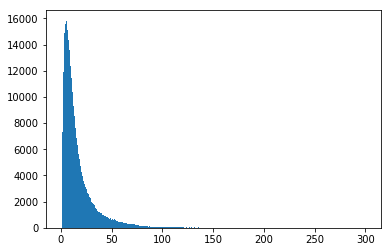

In [30]:
plt.hist(cic2_19p0,bins=300,range=[0,300]);

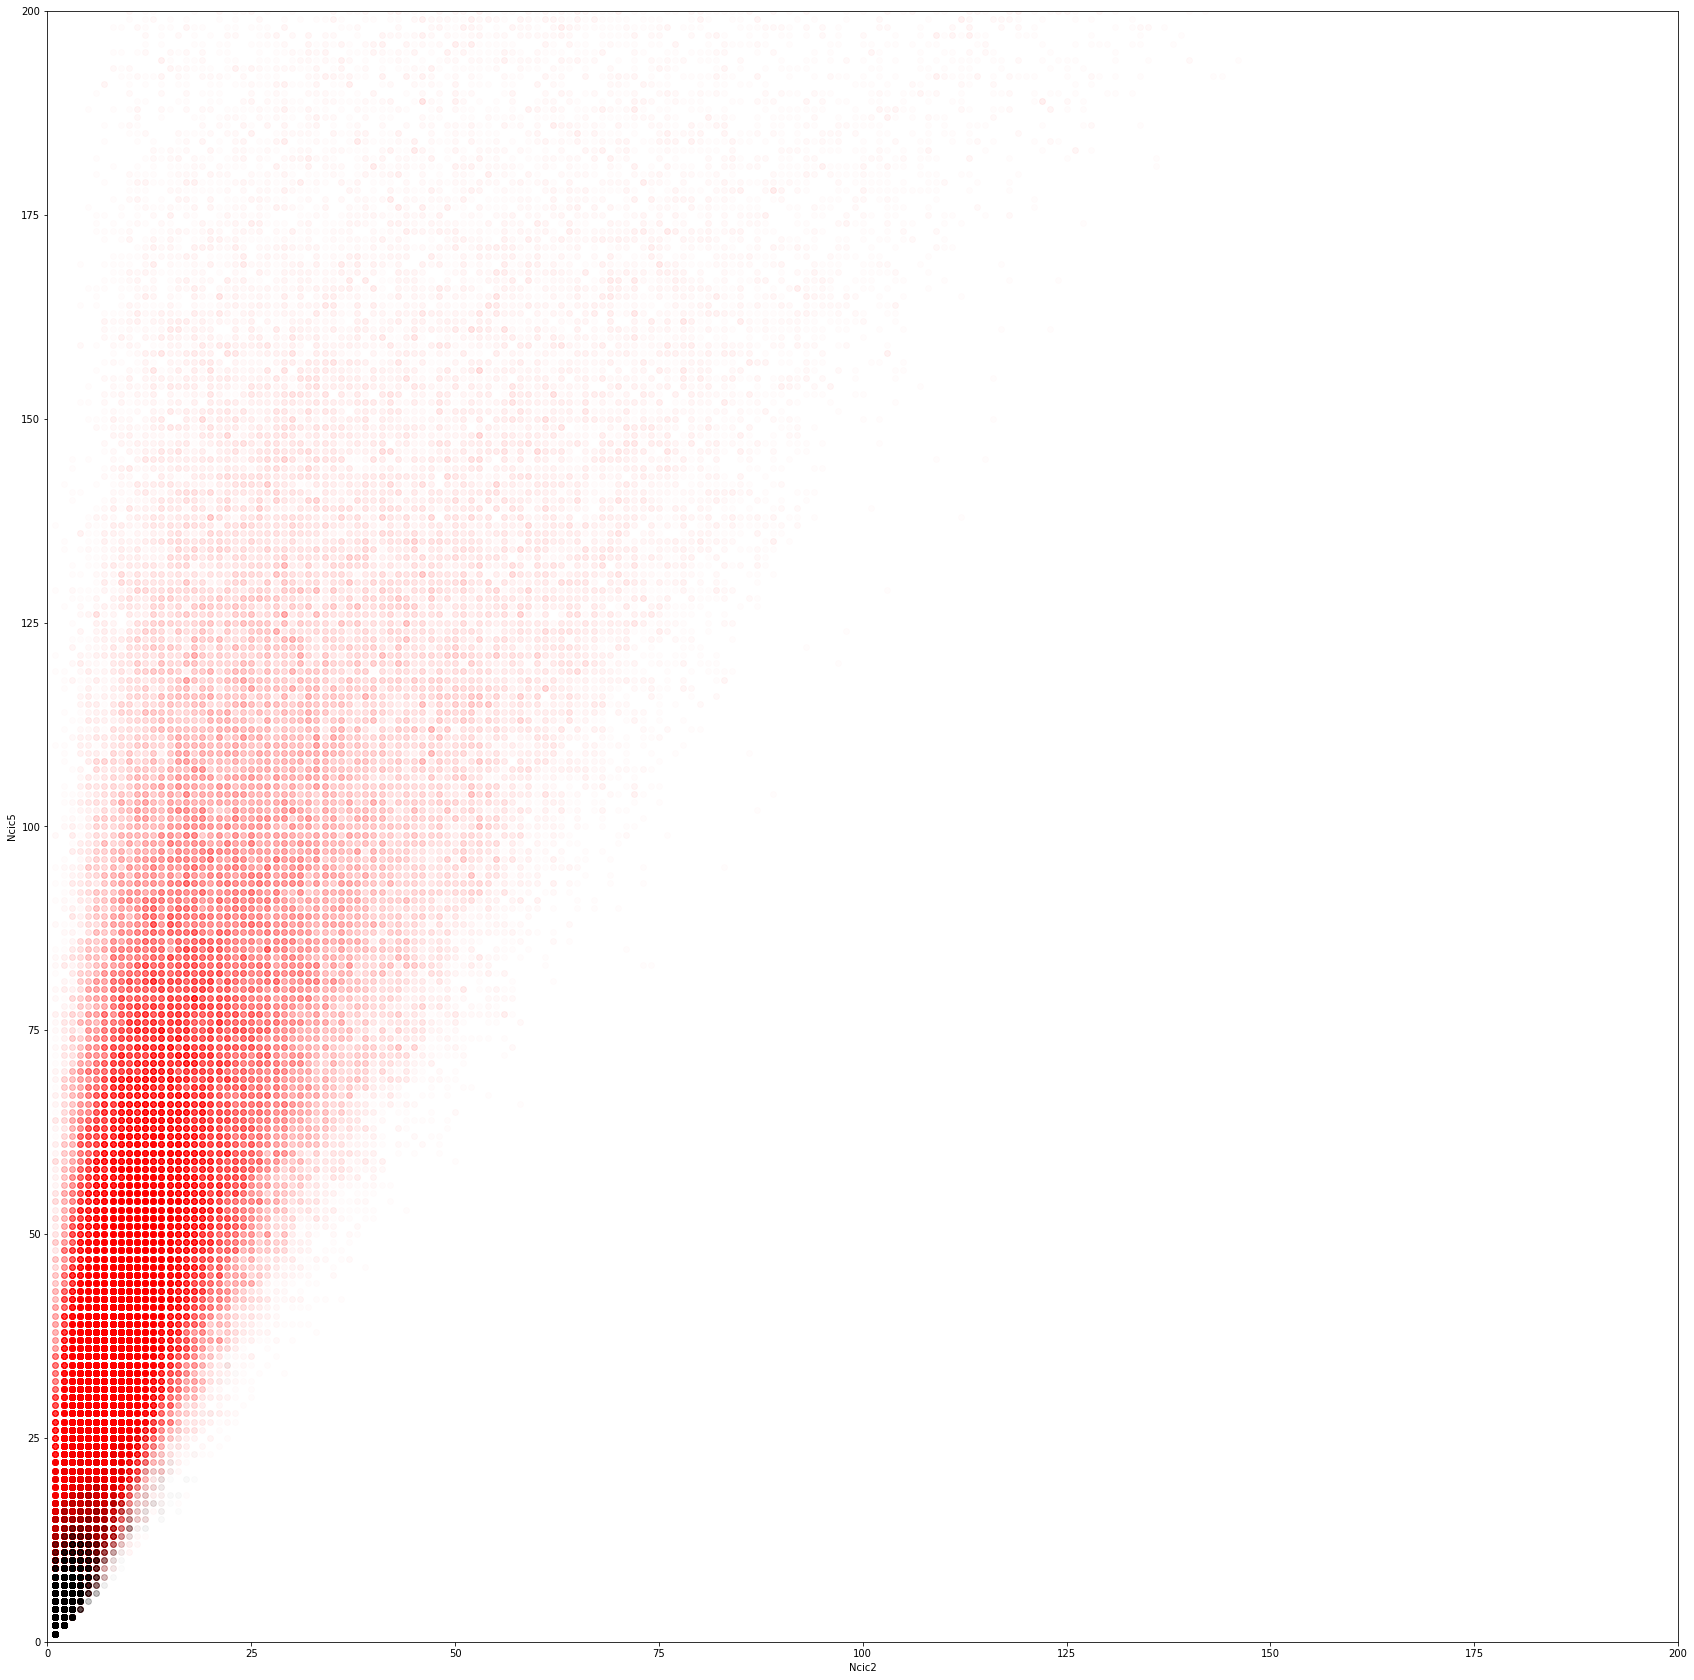

In [65]:
fig,ax = plt.subplots(figsize=[30,30])
ax.set_aspect('equal', 'box')
ax.set_xlim((0,200))
ax.set_ylim((0,200))
ax.scatter(cic2_19p0,cic5_19p0,c='r',alpha=0.01)
ax.scatter(cic2_21p0,cic5_21p0,c='k',alpha=0.01)
ax.set_xlabel('Ncic2')
ax.set_ylabel('Ncic5')

In [76]:
poi15 = np.random.poisson(15,10000).astype(float)
poi50 = np.random.poisson(50,10000).astype(float)

poi3 = np.random.poisson(3,1000).astype(float)
poi10 = np.random.poisson(10,1000).astype(float)

(array([ 1.1 ,  2.12,  2.42,  1.36,  1.02,  1.  ,  0.24,  0.24,  0.19,
         0.  ,  0.14,  0.04,  0.04,  0.02,  0.  ,  0.03,  0.01,  0.01,
         0.  ,  0.02]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 1 Patch objects>)

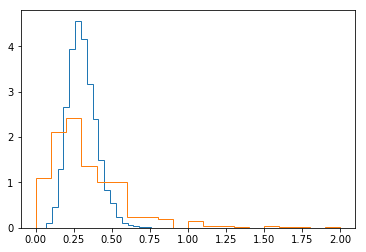

In [80]:
plt.hist(poi15/poi50,bins=20,histtype=u'step',normed=True)
plt.hist(poi3/poi10,bins=20,histtype=u'step',normed=True)